In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [62]:
df=pd.read_csv('Obviously AI Sample Data.csv')

In [63]:
df.shape

(7043, 21)

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
problem_type = 'Classification'
target='Churn'

In [96]:
df.isna().sum().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
def drop_dublicates(X):

    X.drop_duplicates(keep='first', inplace=True)
    X.dropna(axis='index', how='all', inplace=True)
    X.dropna(axis='columns', how='all', inplace=True) 
    return X

In [72]:
df=drop_dublicates(df)

In [73]:
df.shape

(7043, 21)

In [86]:
df = df.drop(columns='customerID')

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [89]:
def target_preprocessing(df, target, problem_type):  
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target].astype(str))       
    return df, le

In [90]:
df, le = target_preprocessing(df, target, problem_type)

In [93]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [94]:
def replace_most_pop_miss(X):

    if len(list(X.select_dtypes(include=['object']).columns)) > 0:
        X.replace(dict.fromkeys(['?', 'n/a', 'nan', 'NaN', ',', 'N/a', 'N/A', 'none', '*', '.'], np.nan), inplace=True)


        X = X.replace(r'^\s*$', np.nan, regex=True)

    return X

In [95]:
df=replace_most_pop_miss(df)

In [97]:
def check_columns_type_with_Nan_replace(X, column):
            # need to define int column with NaN(should be float type)
            X[column] = X[column].fillna(0)
            count_int = 0
            lenth = len(X[column])


            for i in X[column]:
                try:
                    if i%1 == 0:
                        count_int +=1
                except:
                    continue
            if count_int == lenth:
                
                X[column]=X[column].astype(int)
            return X[column]

In [99]:
def define_columns_type(X):
    high_card_features_ls = []
    cat_features_ls = []
    num_features_ls = []
    
    X = pd.DataFrame.copy(X)
    for column in X.columns:     
            # if number of unique values more than 63, that column should be categorical
            # if column numerical
            if (X[column].dtype in [int, float]):
                
                
                # try to replace Nan and check column type
                X[column] = check_columns_type_with_Nan_replace(X, column)
                #check if column 'int'
                if X[column].dtype in [int]:
                    if X[column].nunique()>60:
                        num_features_ls.append(column)
                    else:
                        cat_features_ls.append(column)

                else:
                    num_features_ls.append(column)

            # check object columns   
            elif (X[column].nunique()>60):
                num_features_ls.append(column)
            else:
                cat_features_ls.append(column)

    return cat_features_ls, num_features_ls

In [100]:
cat_features_ls, num_features_ls =  define_columns_type(df.drop(columns=target))

In [101]:
cat_features_ls

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [102]:
num_features_ls

['tenure', 'MonthlyCharges', 'TotalCharges']

In [103]:
df = pd.get_dummies(df, columns = cat_features_ls)

In [104]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [105]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [106]:
x = df.drop(columns=target)
y = df[target]
        
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True,
                                                        random_state=42, stratify=y)


In [107]:
def correlation(df, threshold):
    droped_columns = []  
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if (corr_matrix.iloc[i, j] >= 0.8) and (corr_matrix.columns[j] not in droped_columns):
                    colname = corr_matrix.columns[i] # getting the name of column
                    droped_columns.append(colname)
    df =  df.drop(columns=droped_columns, axis=1)
    return df, droped_columns

In [108]:
x_train, droped_columns=correlation(x_train, 0.8)
if len(droped_columns)== 0:
    x_test=x_test
else:    
    x_test=x_test.drop(columns=droped_columns, axis=1)

In [109]:
x_train.shape

(5634, 38)

In [110]:
droped_columns

['TotalCharges',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [114]:
logreg = LogisticRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(logreg, x_train_s, y_train, scoring='accuracy', cv=folds)
scores 

array([0.80124224, 0.81898846, 0.80567879, 0.79591837, 0.79751332])

In [115]:
logreg.fit(x_train_s, y_train)

LogisticRegression()

In [116]:
print(logreg.score(x_train_s, y_train))

0.8044018459353922


In [117]:
y_pred = logreg.predict(x_test_s)

In [118]:
print(logreg.score(x_test_s, y_test))

0.7977288857345636


In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [120]:
cm

array([[921, 114],
       [171, 203]], dtype=int64)

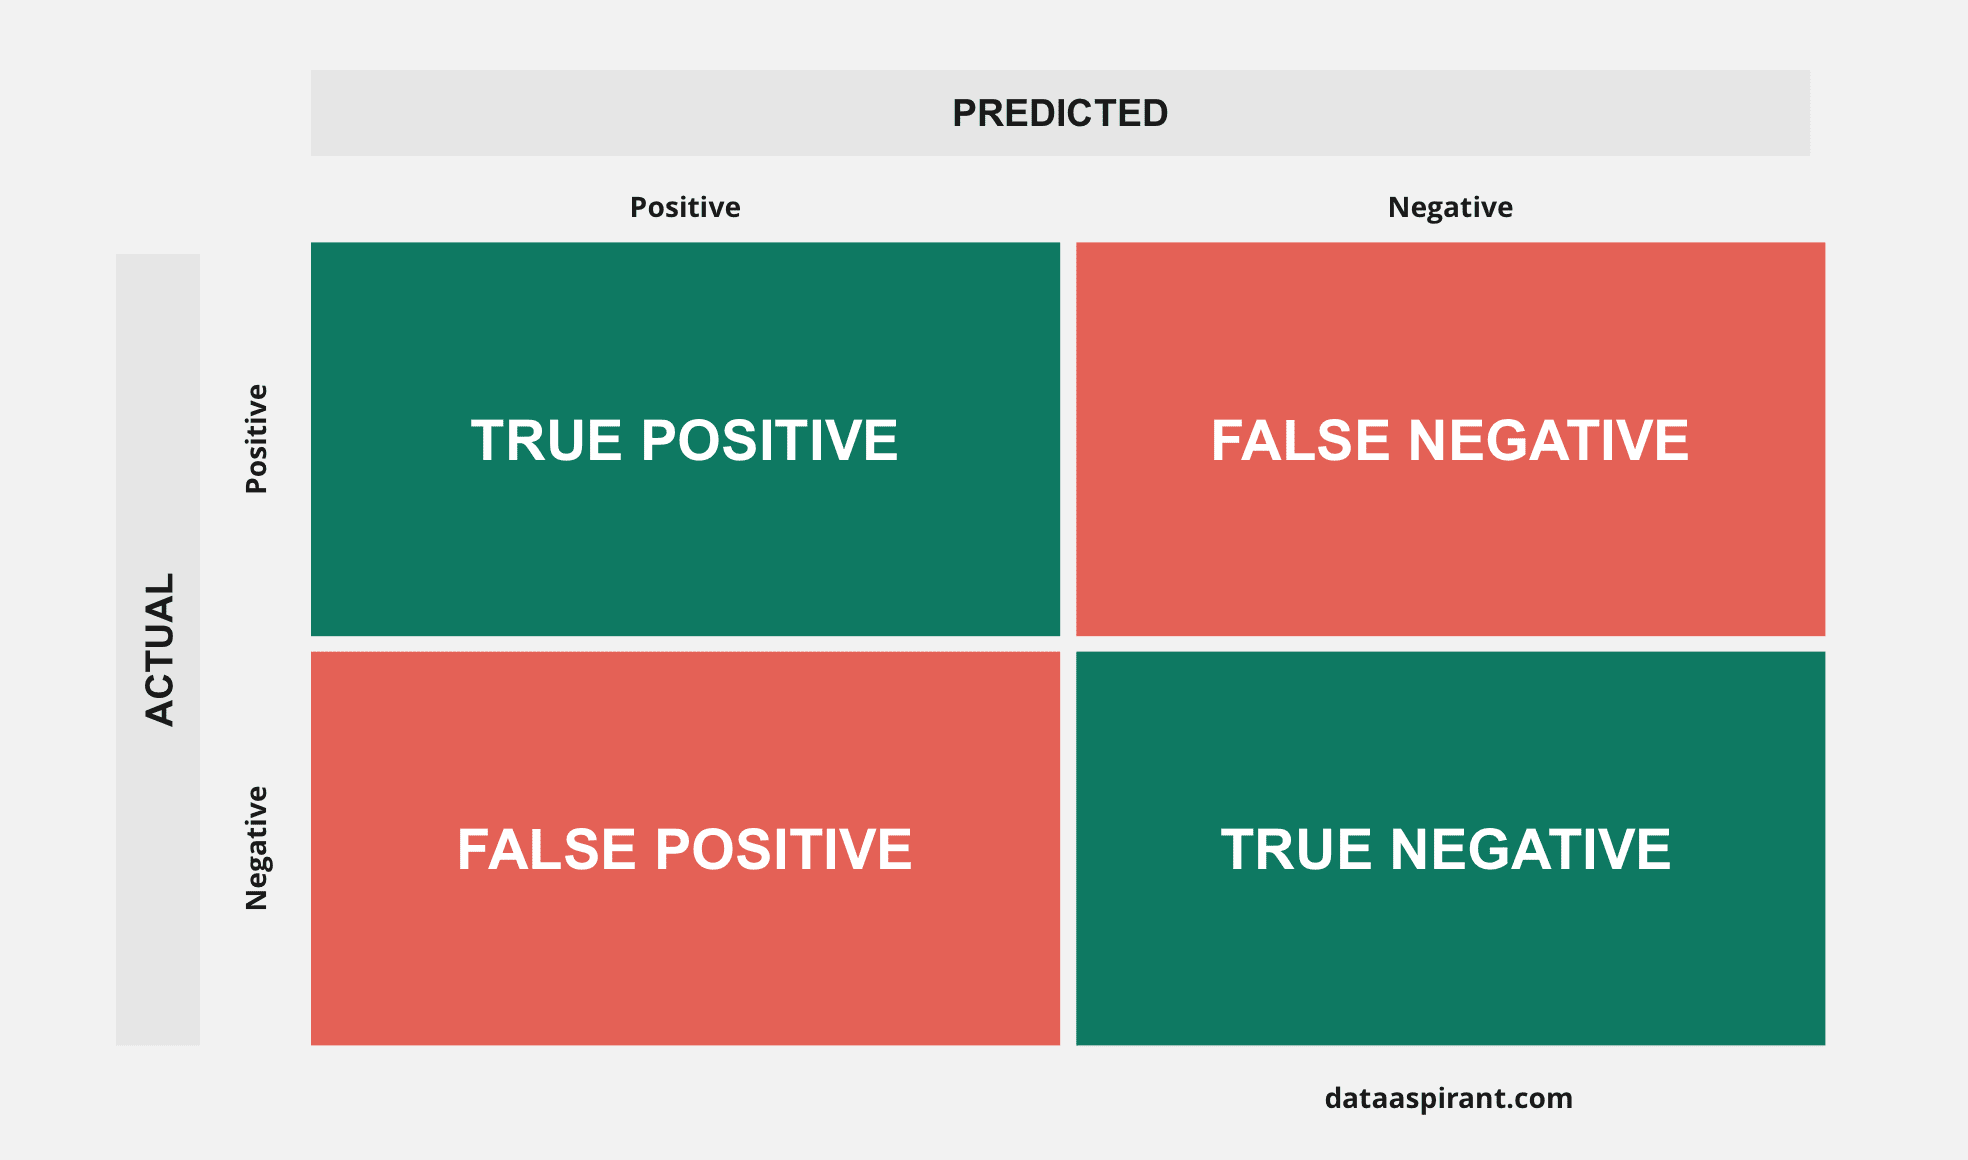

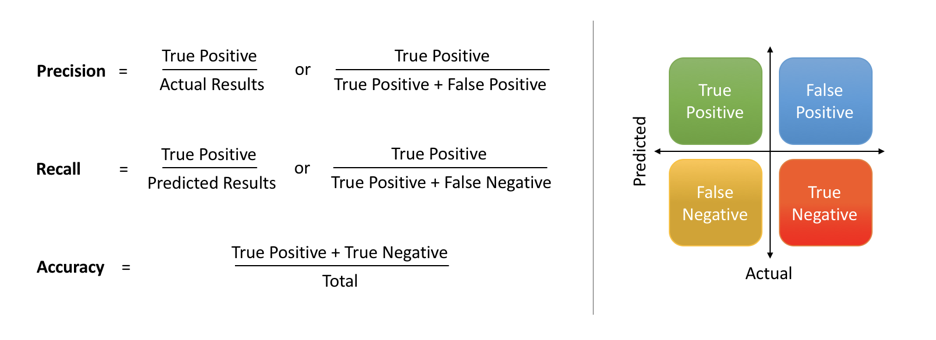

In [121]:
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

In [122]:
from sklearn.ensemble import RandomForestClassifier

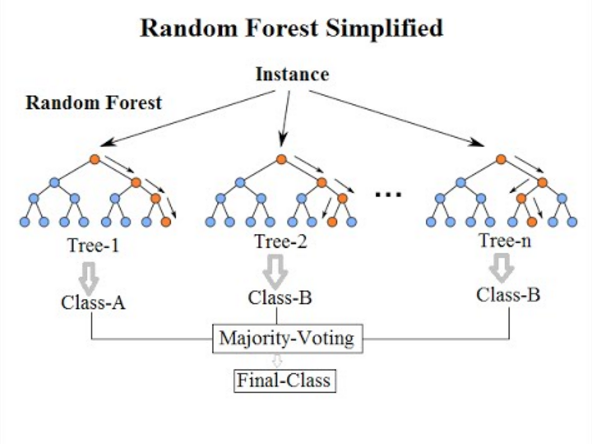

In [128]:
def objective(trial):
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 200)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 100)
    n_estimators =  trial.suggest_int('n_estimators', 20, 100)
    
    regr = RandomForestClassifier(bootstrap = bootstrap, max_depth = max_depth, max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2)
    
    
    score = cross_val_score(regr, x_train, y_train, cv=5, scoring="accuracy")
    accuracy = score.mean()

    return accuracy

In [126]:
def objective(trial):    
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 500)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    classifier_obj = ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators)

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, x_train_s, y_train, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [129]:
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=20, timeout=1800)

[I 2021-12-18 02:24:37,453] A new study created in memory with name: no-name-6bdd0d25-5646-433b-ad79-b6f9b640eed0
[I 2021-12-18 02:24:41,451] Trial 0 finished with value: 0.7964132444235708 and parameters: {'bootstrap': 'False', 'max_depth': 40, 'max_features': 'auto', 'max_leaf_nodes': 45, 'n_estimators': 37}. Best is trial 0 with value: 0.7964132444235708.
[I 2021-12-18 02:24:43,084] Trial 1 finished with value: 0.8026250549644525 and parameters: {'bootstrap': 'True', 'max_depth': 78, 'max_features': 'sqrt', 'max_leaf_nodes': 73, 'n_estimators': 39}. Best is trial 1 with value: 0.8026250549644525.
[I 2021-12-18 02:24:44,704] Trial 2 finished with value: 0.8004945618683028 and parameters: {'bootstrap': 'True', 'max_depth': 137, 'max_features': 'log2', 'max_leaf_nodes': 64, 'n_estimators': 40}. Best is trial 1 with value: 0.8026250549644525.
[I 2021-12-18 02:24:46,158] Trial 3 finished with value: 0.7992531138642808 and parameters: {'bootstrap': 'True', 'max_depth': 78, 'max_features':

In [130]:
study.best_params

{'bootstrap': 'True',
 'max_depth': 78,
 'max_features': 'sqrt',
 'max_leaf_nodes': 73,
 'n_estimators': 39}

In [131]:
optimised_rf = RandomForestClassifier(bootstrap = study.best_params['bootstrap'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     max_leaf_nodes = study.best_params['max_leaf_nodes'],n_estimators = study.best_params['n_estimators'],
                                     n_jobs=2)
#learn
optimised_rf.fit(x_train ,y_train)

RandomForestClassifier(bootstrap='True', max_depth=78, max_features='sqrt',
                       max_leaf_nodes=73, n_estimators=39, n_jobs=2)

In [132]:
tuned_pred=optimised_rf.predict(x_test)

In [133]:
print(optimised_rf.score(x_test, y_test))

0.8026969481902059


In [141]:
from xgboost import XGBClassifier

In [146]:
def objective(trial):
    # XGBoost parameters
    params = {
        "verbosity": 0,  # 0 (silent) - 3 (debug)
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_loguniform("subsample", 0.4, 0.8),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 10.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "gamma": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 10, 1000)
    }

    model = XGBClassifier(**params)
    score = model_selection.cross_val_score(model, x_train, y_train, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [ ]:
pruner = optuna.pruners.HyperbandPruner()
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=100, timeout=1800)

[I 2021-12-18 02:43:52,339] A new study created in memory with name: no-name-d4611595-76e0-4942-b398-b972b7f0bf8e
C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_de

C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\George Ch\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: Th